In [29]:
import numpy as numpy
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
# import sys
# import os
# module_path = os.path.abspath(os.path.join('.'))
# if module_path not in sys.path:
#     sys.path.append(module_path)

from bandits import Bandit
from agents import *

In [30]:
n_actions = 10
distribution = "Bernoulli"

In [31]:
bandit1 = Bandit(n_actions, distribution)
epsilon = 0.01
agent1 = epsGreedyAgent(bandit1, epsilon)
n_episodes = 100000
returns1 = np.empty(n_episodes+1)
regret1 = np.empty(n_episodes+1)
for e in range(1, n_episodes + 1):
    agent1.act()
    returns1[e] = agent1.rewards / e
    regret1[e] = agent1.bandit.get_regret()


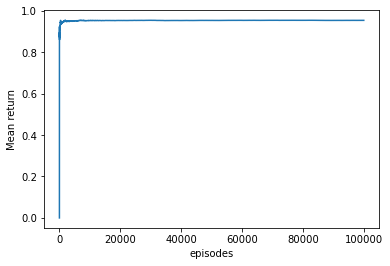

In [32]:
plt.xlabel('episodes')
plt.ylabel('Mean return')
plt.plot(list(range(1, n_episodes+1)), returns1[1:])
plt.show()


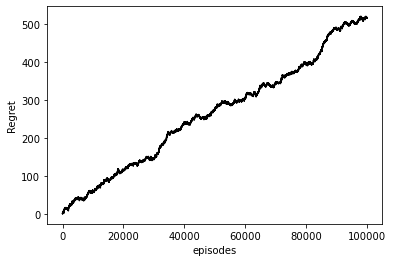

In [33]:
plt.xlabel('episodes')
plt.ylabel('Regret')
plt.plot(list(range(1, n_episodes+1)), regret1[1:], 'k')
plt.show()


In [34]:
bandit2 = Bandit(n_actions, distribution)
Q_2 = np.zeros(n_actions, dtype=float)
agent2 = GreedyAgent(bandit2, Q_2)
n_episodes = 100000
returns2 = np.empty(n_episodes+1)
regret2 = np.empty(n_episodes+1)
for e in range(1, n_episodes + 1):
    agent2.act()
    returns2[e] = agent2.rewards / e
    regret2[e] = agent2.bandit.get_regret()


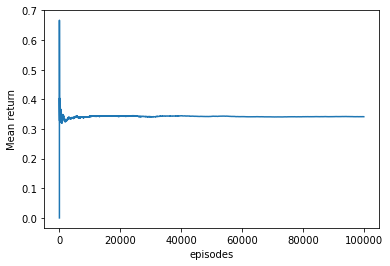

In [35]:
plt.xlabel('episodes')
plt.ylabel('Mean return')
plt.plot(list(range(1, n_episodes+1)), returns2[1:])
plt.show()


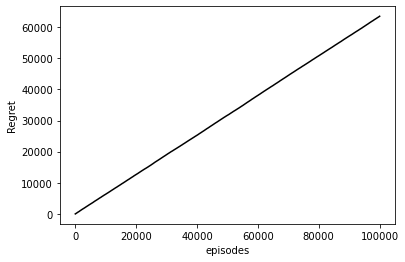

In [36]:
plt.xlabel('episodes')
plt.ylabel('Regret')
plt.plot(list(range(1, n_episodes+1)), regret2[1:], 'k')
plt.show()


In [37]:
bandit3 = Bandit(n_actions, distribution)
c = 2.0
agent3 = UCBAAgent(bandit3, c)
n_episodes = 100000
returns3 = np.empty(n_episodes+1)
regret3 = np.empty(n_episodes+1)
for e in range(1, n_episodes + 1):
    agent3.act()
    returns3[e] = agent3.rewards / e
    regret3[e] = agent3.bandit.get_regret()

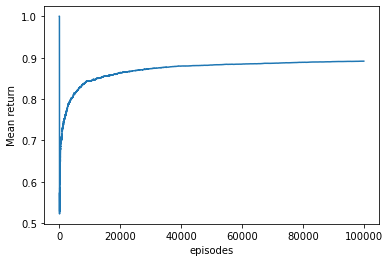

In [38]:
plt.xlabel('episodes')
plt.ylabel('Mean return')
plt.plot(list(range(1, n_episodes+1)), returns3[1:])
plt.show()

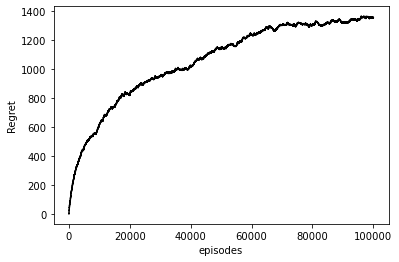

In [39]:
plt.xlabel('episodes')
plt.ylabel('Regret')
plt.plot(list(range(1, n_episodes+1)), regret3[1:], 'k')
plt.show()


In [40]:
bandit4 = Bandit(n_actions, distribution)
agent4 = ThompsonSamplerAgent(bandit4)
n_episodes = 100000
returns4 = np.empty(n_episodes+1)
regret4 = np.empty(n_episodes+1)
for e in range(1, n_episodes + 1):
    agent4.act()
    returns4[e] = agent4.rewards / e
    regret4[e] = agent4.bandit.get_regret()

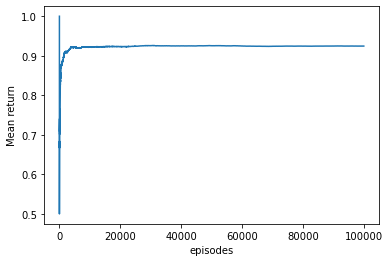

In [41]:
plt.xlabel('episodes')
plt.ylabel('Mean return')
plt.plot(list(range(1, n_episodes+1)), returns4[1:])
plt.show()

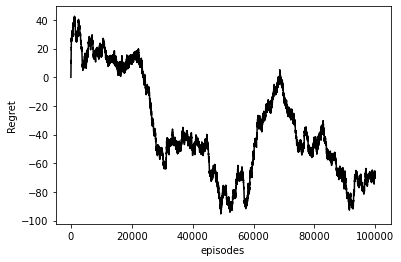

In [42]:
plt.xlabel('episodes')
plt.ylabel('Regret')
plt.plot(list(range(1, n_episodes+1)), regret4[1:], 'k')
plt.show()


In [43]:
bandit5 = Bandit(n_actions, distribution)
alpha = 0.1
agent5 = GradientBanditAgent(bandit5, alpha)
n_episodes = 100000
returns5 = np.empty(n_episodes+1)
regret5 = np.empty(n_episodes+1)
name = 'Pure Exploitation'
for e in range(1, n_episodes + 1):
    agent5.act()
    returns5[e] = agent5.rewards / e
    regret5[e] = agent5.bandit.get_regret()

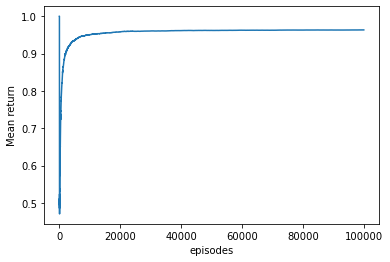

In [44]:
plt.xlabel('episodes')
plt.ylabel('Mean return')
plt.plot(list(range(1, n_episodes+1)), returns5[1:])
plt.show()

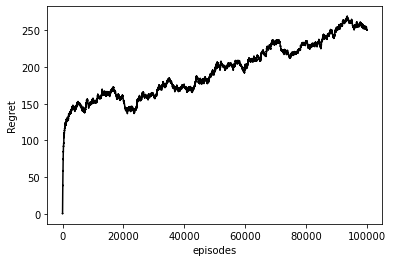

In [45]:
plt.xlabel('episodes')
plt.ylabel('Regret')
plt.plot(list(range(1, n_episodes+1)), regret5[1:], 'k')
plt.show()


In [63]:
import pandas as pd
data1 = {'eps greedy': returns1[1:], 'greedy': returns2[1:], 'UCBA': returns3[1:], 'Thompson sampling': returns4[1:], 'gradient': returns5[1:]} 
df = pd.DataFrame(data1)  

[Text(0.5, 0, 'episodes'), Text(0, 0.5, 'mean return')]

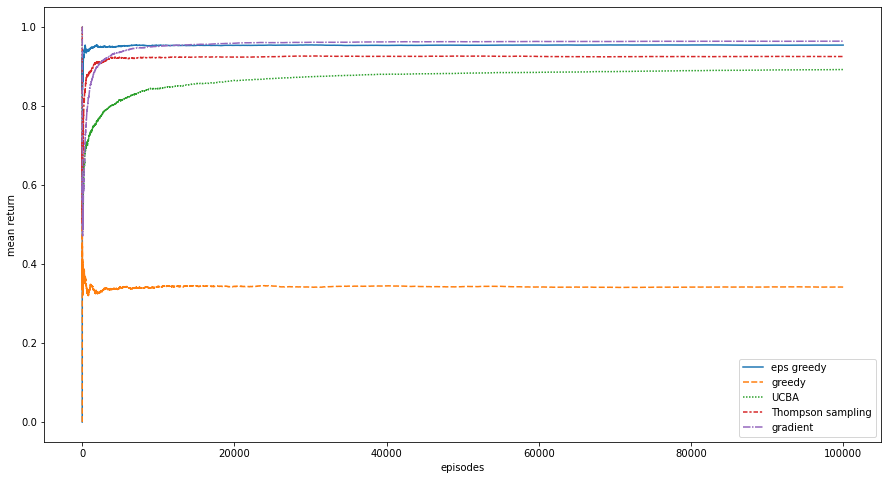

In [64]:
plt.figure(figsize=(15,8))
# plt.xlabel('episodes')
# plt.ylabel('Mean return')
ax = sns.lineplot(data = df)
ax.set(xlabel='episodes', ylabel='mean return')

In [65]:
import pandas as pd
data2 = {'eps greedy': regret1[1:], 'greedy': regret2[1:], 'UCBA': regret3[1:], 'Thompson sampling': regret4[1:], 'gradient': regret5[1:]} 
df2 = pd.DataFrame(data2)  

In [67]:
df2

eps greedy        greedy         UCBA  Thompson sampling    gradient
0        0.958633      0.976304    -0.094921          -0.076165   -0.034097
1        0.917267      0.952608    -0.189842           0.847670   -0.068195
2        0.875900      0.928911    -0.284763           0.771505   -0.102292
3        0.834534      1.905215    -0.379684           0.695340    0.863611
4        0.793167      2.881519    -0.474604           0.619175    0.829513
...           ...           ...          ...                ...         ...
99995  515.509971  63494.476774  1353.291934         -69.188701  250.400108
99996  515.468605  63494.453077  1353.197013         -69.264866  250.366011
99997  515.427238  63495.429381  1353.102092         -69.341031  250.331913
99998  515.385872  63496.405685  1354.007171         -69.417196  250.297816
99999  515.344505  63497.381989  1353.912250         -69.493361  250.263719

[100000 rows x 5 columns]

[Text(0.5, 0, 'episodes'), Text(0, 0.5, 'Regret')]

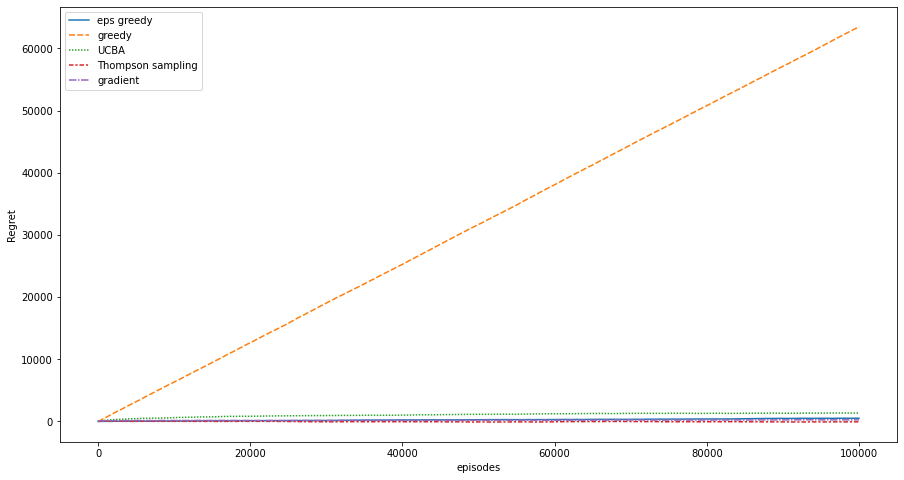

In [68]:
plt.figure(figsize=(15,8))
ax = sns.lineplot(data = df2)
ax.set(xlabel='episodes', ylabel='Regret')